In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil

folder images/ is from this dataset https://www.kaggle.com/datasets/splcher/animefacedataset

In [2]:
d = glob.glob("images/*")
d = [a.replace("_",".").replace("/",".").split(".") for a in d]
d = [a[0]+"/"+a[1]+"_"+a[2]+"."+a[3] for a in d if a[2]=='2019']
len(d)

1777

In [3]:
for img in d:
    shutil.copyfile(img, "img/"+img.split("/")[1])

In [10]:
d = glob.glob("img/*")

In [36]:
images = np.array([np.asarray(Image.open(a).resize((64, 64), resample=Image.Resampling.BOX)) for a in d])
images = (images/255)

In [37]:
images.shape

(1686, 64, 64, 3)

In [38]:
cut = images.shape[0] // 8
for i in range(8):
    np.save(f"dataset/dataset-{i}.npy", images[cut*i:cut*(i+1)])

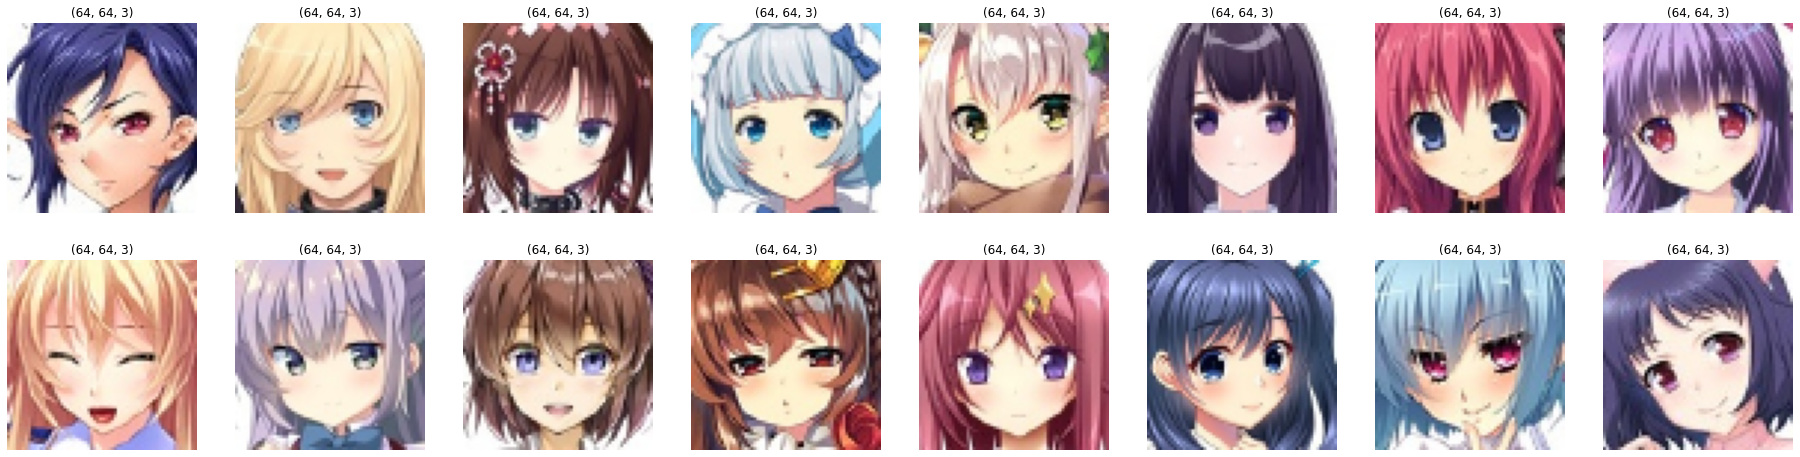

In [35]:
indexs = list(range(len(d)))
random.shuffle(indexs)
indexs = [d[i] for i in indexs[:16]]

images = [np.asarray(Image.open(a).resize((64, 64), resample=Image.Resampling.BOX)) for a in indexs]

plt.subplots(figsize=(32, 8))
for i in range(16):
    ax = plt.subplot(2, 8, i+1)
    ax.axis('off')
    ax.imshow(images[i])
    ax.set_title(str(images[i].shape))
plt.show()